# Deconstructing a Monet
> Let's try and mathematically deconstruct a Monet

- toc: true 
- badges: true
- comments: true
- categories: [Computer Vision,Linear Algebra]
- image: images/2020-04-13-Deconstructing-A-Monet/header.jpg

![](../images/2020-04-13-Deconstructing-A-Monet/Monet_-_Sonnenaufgang_bei_Etretat.jpg)

## An introduction

Let's go on an adventure, and try and answer some questions from an incredible painting by Claude Monet called [The Cliff, Étretat, Sunset](https://learn.ncartmuseum.org/artwork/the-cliff-etretat-sunset/).

In particular, I'm interested if we can work out:

1. Where it was painted.
2. When it was painted.

These questions are by no means new, they were addressed by [Don Olson](https://www.smithsonianmag.com/arts-culture/forensic-astronomer-solves-fine-arts-puzzles-116770403) and his [team](https://www.txstate.edu/news/news_releases/news_archive/2014/January-2014/Olson012114.html) from Texas State University].


However I think it's an interesting exercise, and one that we can learn from, and help us think about some important matehmatical concepts from a new perspective. 

What do we truly know? After all, we are trying to mathematically analyze a painting by possibly the most famous impressionlist artist in history. 


## Gathering what we know


Let's start by collecting some pieces of infomrmation that we know.

Looking at the painting, I notice a few useful features.

1. The sun
2. A distinctive rock pinicle.
3. The horizon

Let's look at each of these in isolation.

![Measuements on the The Cliff, Étretat, Sunset](../images/2020-04-13-Deconstructing-A-Monet/Measurements.jpg)


### The Sun

Let's start with some facts:

* The sun has a radius of $6.96\times 10^8$ m
* The sun is $1.5\times 10^{11}$ m from earth.

In the image of the painting, it occupies a bounding box limited by:
* x1,y1 = 4180px, 1973px
* x2,y2 = 4330px, 2115px

I.e. it has a radius of ±73 pixels. 

Let's pause for a moment, and make a critical assumption, that it was painted with perspecrtive. 

Other works by Monet clearly have perspective, which we can directly measure, for example *The Railway Bridge at Argenteuil* which we can see below.

![The Railway Bridge at Argenteuil](../images/2020-04-13-Deconstructing-A-Monet/The_Railway_Bridge_at_Argenteuil.jpg)

If we work with this assumption, we can proceed to work out the "focal length" of the painting in pixels.


![Image Triangle](../images/2020-04-13-Deconstructing-A-Monet/Triangle.jpg)

From this, we can see that 


$\frac{R_{sun}}{D_{sun}} = \frac{r_{pixels}} {f_{pixels}}$

or 

$ f_{pixels} = \frac{r_{pixels}}{(\frac{R_{sun}}{D_{sun}})}$

In [1]:
R_sun = 6.96*10**8 
D_sun = 1.5*10**11
r_pixels = 73
f_pixels = (r_pixels/(R_sun/D_sun))
print(int(f_pixels))


15732


$ f_{pixels} = 15.7 \times 10^3$

### A distinctive rock pinicle.
    

Height of the pinicle{% fn 1 %}: 
* Low tide = 54.5m
* High tide = 46.0m 
* Avg = 50.25m 

In the image, we see that:
* Pinicle Peak = 1423 px
* Pinicle Base = 2486 px
* Pinicle Height = 1063 px


Using the same geometric argument from before, we see that:

$\frac{R_{pinicle}}{D_{pinicle}} = \frac{r_{pixels}} {f_{pixels}}$

$D_{pinicle} = \frac{R_{pinicle}}{(\frac{r_{pixels}} {f_{pixels}})}$


In [2]:
R_pinicle = 50.25
r_pixels = 1063
D_pinicle = int(R_pinicle/(r_pixels / (f_pixels)))
print(D_pinicle)

743


So assuming the pinicle is approximately 743m from the painter. 

### The Horizon

Let's look at the last point we can clearly measure in the painting, the horizon line.

The distance $d$ to the horizon is:
${\displaystyle d\approx {\sqrt {2\,h\,r}}\,}$

Where:
* $r$ is the radius of the earth ($6,371 \times 10^3$m)
* $h$ is the height of the observer

Assuming that $h$ is at least 2m, then the distance to the horizon is at least 5km.

Using similar arguments as before, we can find the height of Monet above the waterline. 

![Horizon Triangle](../images/2020-04-13-Deconstructing-A-Monet/Horizon.jpg)



$\frac{H_{Monet}}{D_{horizon}} = \frac{H_{intersection}}{D_{horizon}-D_{pinicle}}$



$H_{Monet} =H_{intersection} \times  \frac{D_{horizon}}{D_{horizon}-D_{pinicle}}$
 
 

Where:

$H_{intersection}= 50.25 \times \frac{H_{intersection}}{H_{pinicle}}$

We can now find an upper and lower bound for the height of Monet's view point above sea level.

If we look at the fraction, $\frac{D_{horizon}}{D_{horizon}-D_{pinicle}}$, we can see that it approaches 1, as the horizon gets further and further away. 


In [3]:
R_pinicle = 50.25
Horizon_Height_Above_pinicle_base_pixels = 136
Pinicle_Height_pixels = 1063
D_horizon = 5_000

H_monet_lower = R_pinicle * (Horizon_Height_Above_pinicle_base_pixels/Pinicle_Height_pixels)  *  D_horizon/(D_horizon-D_pinicle)
H_monet_upper = R_pinicle * (Horizon_Height_Above_pinicle_base_pixels/Pinicle_Height_pixels)

print(H_monet_lower)
print(H_monet_upper)


7.551062485539284
6.4289746001881465


This gives us height of Monet's view point is between 7.5m and 6.5m, depending on the distance to the horizon.

We could continue to iteritvely optimize to find a precise solution, but we won't. 


## Broad Brushstrokes

`xtol` termination condition is satisfied.
Function evaluations 25, initial cost 1.2325e+06, final cost 7.3048e+00, first-order optimality 3.58e-01.


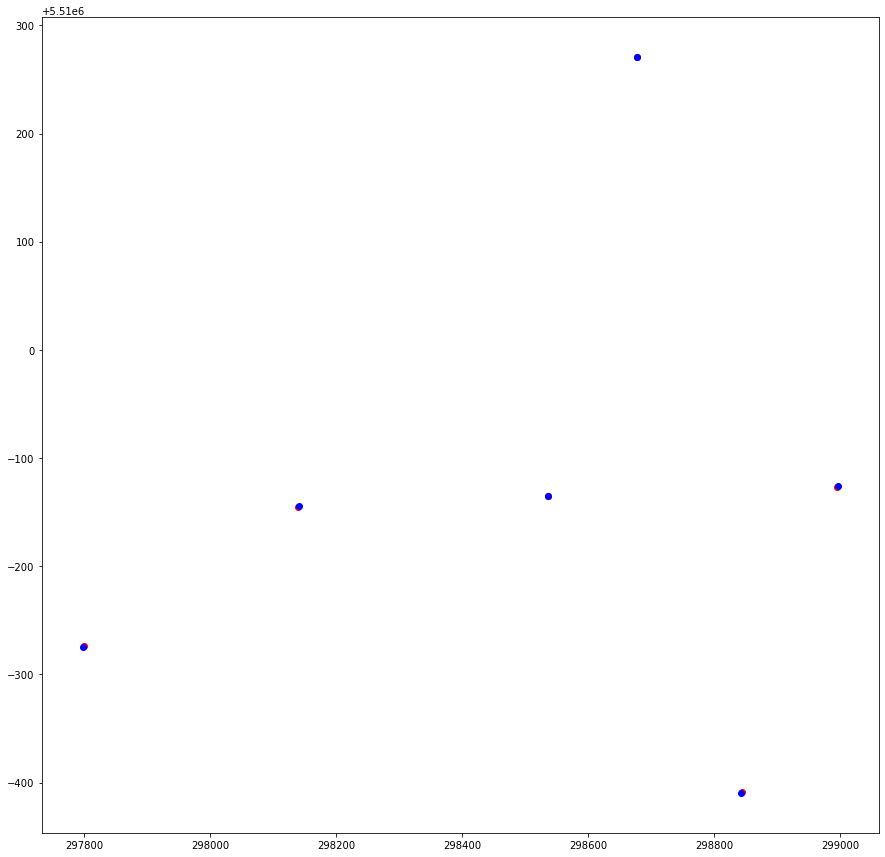

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
plt.rcParams["figure.figsize"] = (15,15)

def create_matrix(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    theta = x[4]
    matrix =  np.array([[a*np.cos(theta),-b*np.sin(theta),c],
                                    [a*np.sin(theta),b*np.cos(theta),d],
                                    [0,0,1]])
    return(matrix)

def map_points(matrix,points):
    points_h = np.hstack([points,np.ones([points.shape[0],1])])
    translated = np.dot(matrix,points_h.T).T
    translated = translated[:,0:2]
    return(translated)
    
def fun(x,points_px, points_UTM):
    matrix = create_matrix(x) 
    mapped_points = map_points(matrix,points_px)
    delta = (points_UTM - mapped_points).ravel()
    return(delta)

def find_map(points_UTM,points_px):
    x0 = np.array([0,0,points_UTM[0][0],points_UTM[0][1],0])
    
    optimization_results = least_squares(fun, x0,  verbose=1, x_scale='jac', ftol=1e-4, method='lm',
                                     loss='linear',args=(points_px,points_UTM))
    
    matrix = create_matrix(optimization_results.x)
    return(matrix)
    

points_UTM = np.array([[298677.80,5510270.88],[298139.09,5509855.06],[298844.00,5509591.13],
                 [298535.40,5509865.06],[298994.63,5509873.62],[297799.09,5509725.99]])

points_px = np.array([[2031,663],[1189,1367],[2341,1755],[1828,1328],[2572,1286],[640,1599]])

    
matrix = find_map(points_UTM,points_px)    

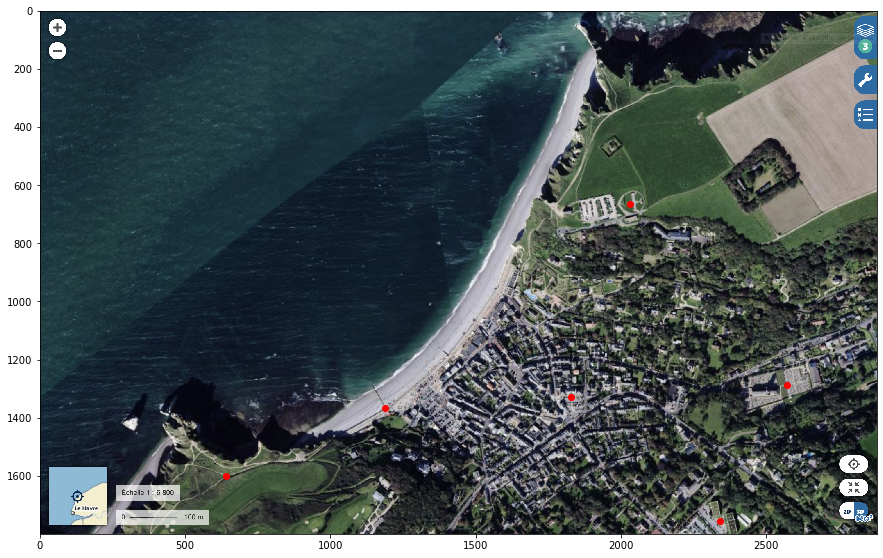

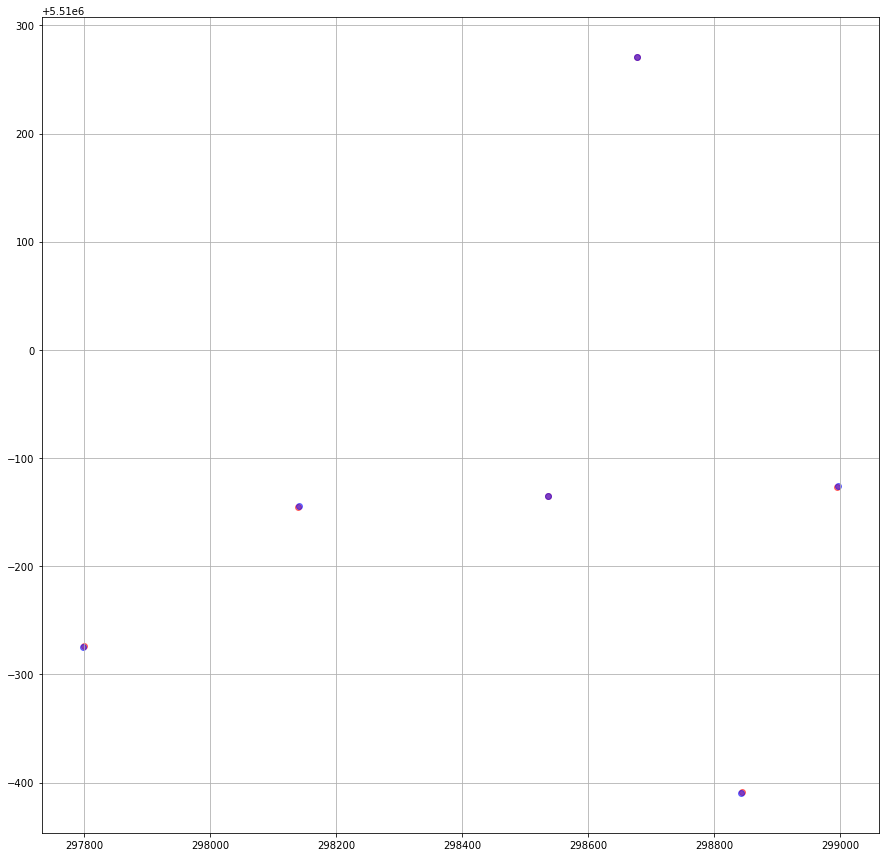

In [17]:
from PIL import Image

mapped_points = map_points(matrix,points_px)

img = Image.open('data/2020-04-13-Deconstructing-A-Monet/AerialPhoto.png')
plt.scatter(points_px[:,0],points_px[:,1],color='r')

plt.imshow(img)
plt.show()

plt.scatter(points_UTM[:,0],points_UTM[:,1],color='r',alpha=0.5)
plt.scatter(mapped_points[:,0], mapped_points[:,1],color='b',alpha=0.5)

plt.grid()
mean_error = np.mean(np.linalg.norm(mapped_points-points_UTM,axis=1))
plt.show()

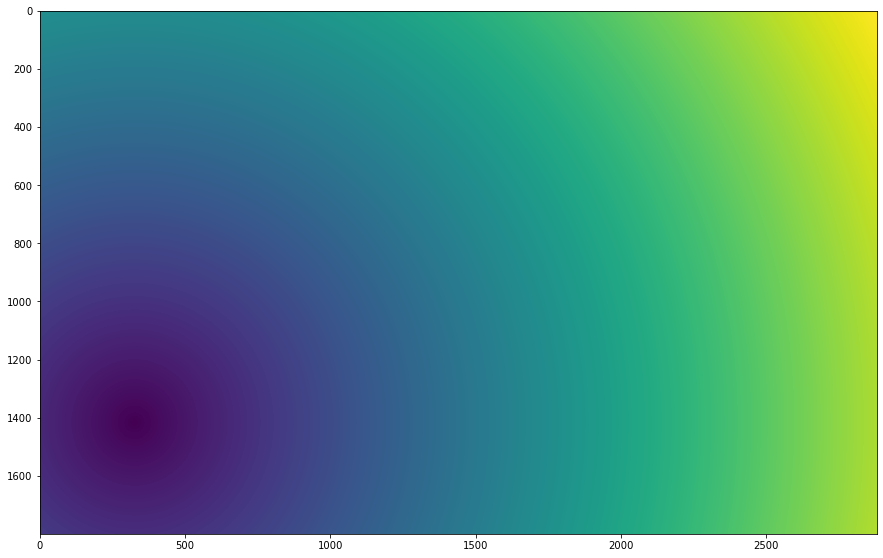

In [34]:
rows,cols = 1800,2880
array = np.array((rows,cols))

inv_matrix = np.linalg.inv(matrix)

x = np.arange(0, cols)
y = np.arange(0, rows)
xv, yv = np.meshgrid(x, y)


point_grid = np.vstack([xv.ravel(),yv.ravel()]).T
mapped_grid = map_points(matrix,point_grid)


radius = np.linalg.norm(mapped_grid - np.array([297607.31,5509845.30]),axis=1)

plt.imshow(radius.reshape(rows,cols))
plt.show()




#print(matrix)
#print(np.linalg.inv(matrix))
#print(np.dot(matrix,np.linalg.inv(matrix)))



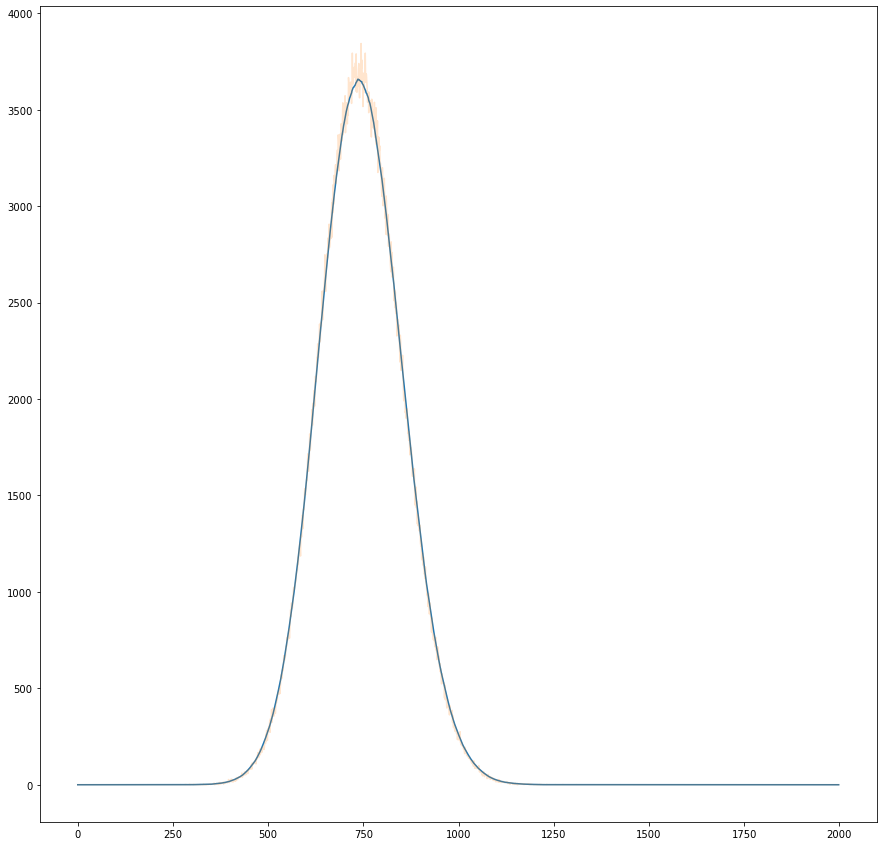

In [63]:
def compute_focal_length():
    R_sun = 6.96*10**8 
    D_sun = 1.5*10**11
    sun_radius_pixels = np.random.normal(73,10)
    f_pixels = (sun_radius_pixels/(R_sun/D_sun))
    return(f_pixels)

def compute_distance_to_pinicle(f_pixels):
    height_pinicle_meters = np.random.uniform(46,54.5)
    hieght_pinicle_pixels = np.random.normal(1063,10)
    distance_pinicle_meters = height_pinicle_meters/(hieght_pinicle_pixels/(f_pixels))
    return(distance_pinicle_meters)

distances = []
for i in range(1_000_000):
    f_pixels = compute_focal_length()
    distance_pinicle_meters = compute_distance_to_pinicle(f_pixels)
    distances.append(distance_pinicle_meters)

hist,bins = np.histogram(distances,bins=np.arange(0,2000))

filtered = np.convolve(0.02*np.ones(50),hist, 'same')
plt.plot(filtered)
plt.plot(hist,alpha=0.2)
plt.show()

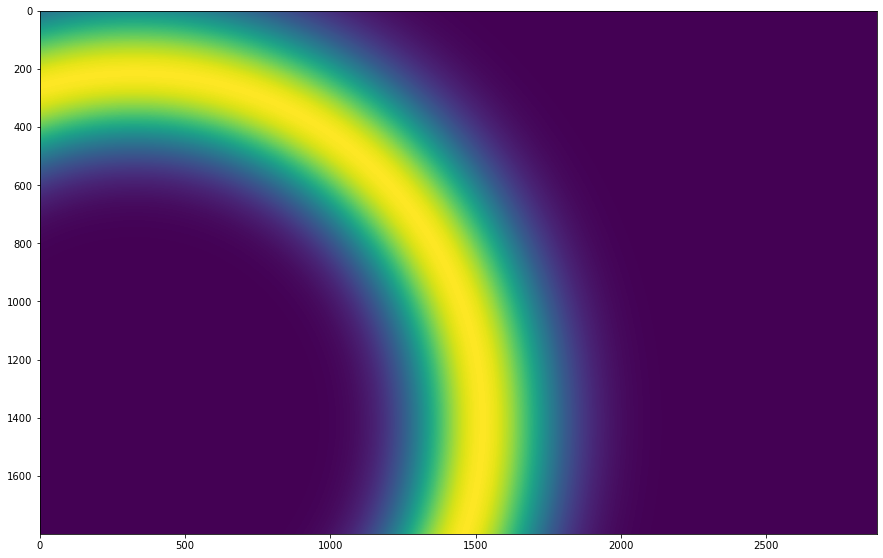

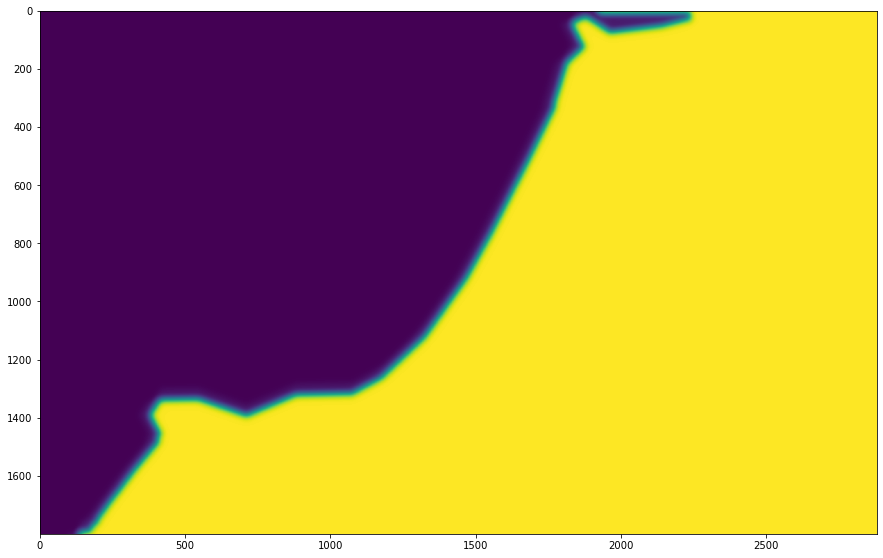

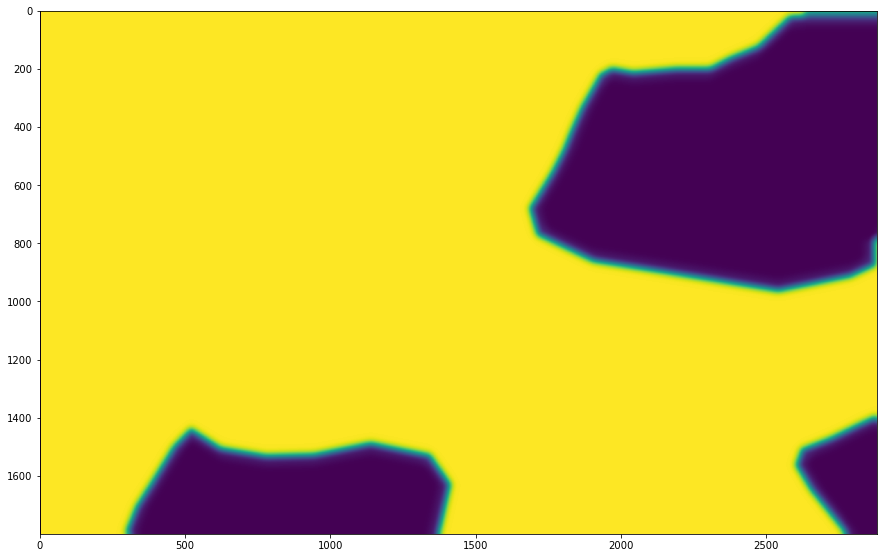

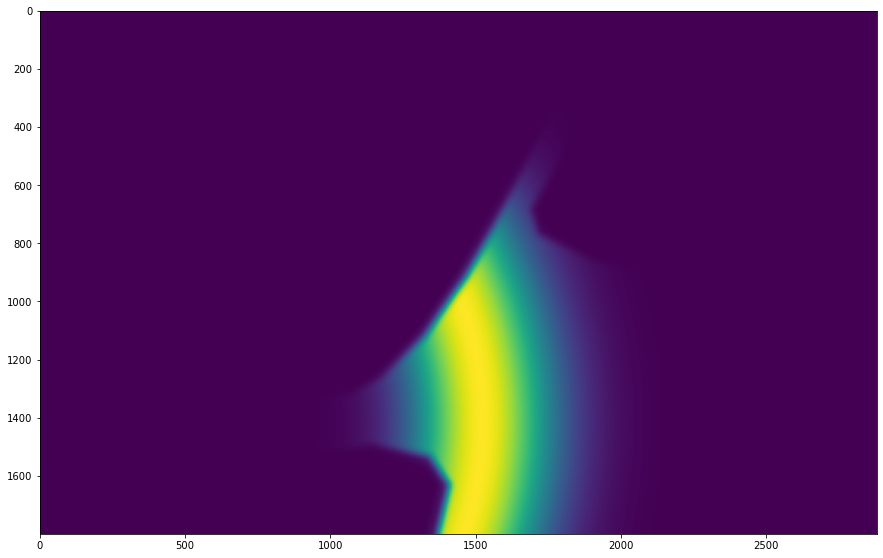

In [86]:
radial_likelihood = filtered[radius.astype(np.int)].reshape(rows,cols)

plt.imshow(radial_likelihood)
plt.show()

sea = np.asarray(Image.open('data/2020-04-13-Deconstructing-A-Monet/Sea.png'))
sea = sea[:,:,0].astype(np.float64)
plt.imshow(sea)
plt.show()


height = np.asarray(Image.open('data/2020-04-13-Deconstructing-A-Monet/Height.png'))
height = height[:,:,0].astype(np.float64)

plt.imshow(height)
plt.show()


plt.imshow(radial_likelihood*sea*height)
plt.show()






## Putting it all together

{{ '"Several early guidebooks gave the Needle a height of 225 feet (69 meters) or 230 feet (70 meters), exaggerated values adopted by the majority of recent authors.

Our results showed that even near low tide the top of the Needle stands only about 179 feet (54.5 meters) above the exposed base. 

When the highest possible tides occur, 151 feet (46 meters) of the Needle remain visible above the waves. 

This photograph shows a view from the Jambourg beach near low tide, with the high-water mark clearly visible on the Needle about 28 feet (8.5 meters) above the exposed base."' | fndetail: 1 }}